# 載入必要套件或取消科學記號

In [1]:
import re
import os
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 8.0) #視覺圖放大一倍，預設 (8.0,4.0)
plt.rcParams['image.interpolation'] = 'nearest'

In [ ]:
#np.__version__,pd.__version__

In [3]:
pd.options.display.float_format = '{:.2f}'.format  #pandas 取消科學記號，只顯示小數點第二位

---

# 1.顯示資料集清單列

In [4]:
def show_data():  #以清單方式顯示data資料夾的內容
    ''' 輸出data資料夾下所有的csv檔案及容量。'''
    check_dir=os.listdir('.')
    if 'data' in check_dir:
        os.chdir('data')
        print('# Index&File '+' '*30+'sizes')
        index = 1
        for f in glob.glob('*.csv'):
            print('{}.'.format(index)+f.ljust(40) + str(round(os.path.getsize('' + f) / 1000000, 2)) + 'MB')
            index += 1
    else:
        print("警告:請先建立data資料夾，並將csv檔案放入該資料夾。")

In [ ]:
#show_data.__doc__  #文件說明

In [5]:
show_data()

# Index&File                               sizes
1.application_test.csv                    26.57MB
2.application_train.csv                   166.13MB
3.installments_payments.csv               723.12MB
4.previous_application.csv                404.97MB


---

# 2.載入資料集

In [6]:
def load_data(num):
    '''傳入資料集清單列的index，並將選定的資料載入於記憶體內。'''
    global data
    global data_name
    data =''
    data_list = glob.glob('*.csv')
    num -= 1
    data_name = (data_list[num])
    print('Loading File is = '+data_list[num])
    data = pd.read_csv("{}".format(data_name))
    print('此資料集共有 {:,} 列， {:,} 欄，總計 {:,} 筆資料。'.format(data.shape[0],data.shape[1],data.size))

In [ ]:
#load_data.__doc__  #文件說明

In [7]:
load_data(4) #輸入清單列的index

Loading File is = previous_application.csv
此資料集共有 1,670,214 列， 37 欄，總計 61,797,918 筆資料。


---

## 將空白字元（空格、換行符號等）全部取代為空值(NAN)...非常耗時(主要驗證資料有沒有人為錯誤）

In [ ]:
# data.replace(to_replace=r'^\s*$',value=np.nan,regex=True,inplace=True)

---

# 3.資料集空值視覺化

In [8]:
def show_null(): #空值運算
    '''輸出資料集內欄位哪些含有空值，顯示數量及比例並繪製圖表。'''
    total_coulumns = data.columns.values.size #統計資料集總共有多少欄位
    count_null = data.isnull().any() #以T/F顯示哪些是含有空值的欄位
    count_total_null = count_null.sum() #以T/F顯示哪些是含有空值的欄位
    count_null = data.isnull().sum()[count_null==True] #以Mark遮罩方式，去除沒有空值的欄位
    null_percent = (100 * count_null / len(data)) #以百分比顯示單一欄位的空值百分比
    null_table = pd.concat([count_null, null_percent], axis=1) 
    null_table = null_table.rename(columns={0: '空值數量', 1: '空值比例(%)'}) 
    print(null_table.sort_values(by='空值數量', ascending=False)) 
    print('{} 資料集總計有 {} 個欄位，\n其中有空值的欄位計有 {} 個({:.2f}%)。'.format(data_name,total_coulumns,count_total_null,count_total_null/total_coulumns*100))
    count_null.plot(kind='bar',title='number of missing values') 

In [ ]:
# show_null.__doc__ #文件說明

                              空值數量  空值比例(%)
RATE_INTEREST_PRIMARY      1664263    99.64
RATE_INTEREST_PRIVILEGED   1664263    99.64
AMT_DOWN_PAYMENT            895844    53.64
RATE_DOWN_PAYMENT           895844    53.64
NAME_TYPE_SUITE             820405    49.12
DAYS_FIRST_DRAWING          673065    40.30
DAYS_FIRST_DUE              673065    40.30
DAYS_LAST_DUE_1ST_VERSION   673065    40.30
DAYS_LAST_DUE               673065    40.30
DAYS_TERMINATION            673065    40.30
NFLAG_INSURED_ON_APPROVAL   673065    40.30
AMT_GOODS_PRICE             385515    23.08
AMT_ANNUITY                 372235    22.29
CNT_PAYMENT                 372230    22.29
PRODUCT_COMBINATION            346     0.02
AMT_CREDIT                       1     0.00
previous_application.csv 資料集總計有 37 個欄位，
其中有空值的欄位計有 16 個(43.24%)。


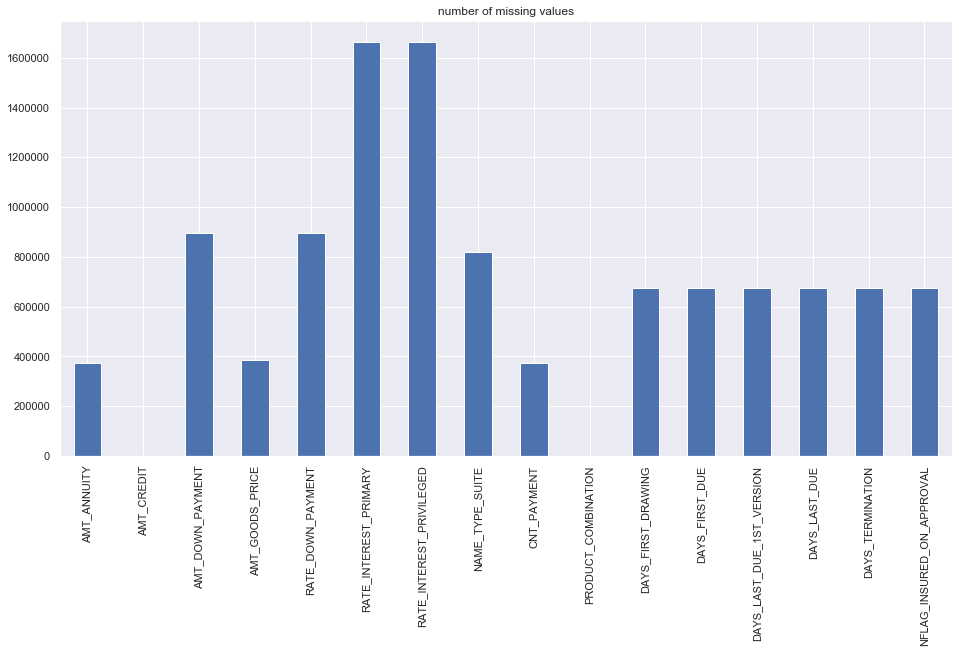

In [9]:
show_null() #將資料欄位有空值部分視覺化

---

# 4.檢視特徵型別(顯示品質報告) 

In [10]:
def data_categorical_report():
    '''輸出類別型別資料品質報告'''
    if sum(data.dtypes==object) !=0: 
        show_data=data.select_dtypes(include=['object']).describe()
        get_num=len(data.select_dtypes(include=['object']).columns)
        print('{} 資料集為類別型別欄位計有 {} 個。'.format(data_name,get_num))
        return show_data
    else:
        print('{} 資料集沒有非數值型別!!!'.format(data_name))
def data_integer_report():
    '''輸出數值型別資料品質報告'''
    show_data=data.select_dtypes(include=['int64','float64']).describe()
    get_num=len(data.select_dtypes(include=['int64','float64']).columns)
    print('{} 資料集為數值型別欄位計有 {} 個。'.format(data_name,get_num))
    return show_data

##### 數值型別

In [ ]:
# data_categorical_report.__doc__ #文件說明

In [11]:
data_integer_report()

previous_application.csv 資料集為數值型別欄位計有 21 個。


,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1670214.00,1670214.00,1297979.00,1670214.00,1670213.00,774370.00,1284699.00,1670214.00,1670214.00,774370.00,...,5951.00,1670214.00,1670214.00,1297984.00,997149.00,997149.00,997149.00,997149.00,997149.00,997149.00
mean,1923089.14,278357.17,15955.12,175233.86,196114.02,6697.40,227847.28,12.48,1.00,0.08,...,0.77,-880.68,313.95,16.05,342209.86,13826.27,33767.77,76582.40,81992.34,0.33
std,532597.96,102814.82,14782.14,292779.76,318574.62,20921.50,315396.56,3.33,0.06,0.11,...,0.10,779.10,7127.44,14.57,88916.12,72444.87,106857.03,149647.42,153303.52,0.47
min,1000001.00,100001.00,0.00,0.00,0.00,-0.90,0.00,0.00,0.00,-0.00,...,0.37,-2922.00,-1.00,0.00,-2922.00,-2892.00,-2801.00,-2889.00,-2874.00,0.00
25%,1461857.25,189329.00,6321.78,18720.00,24160.50,0.00,50841.00,10.00,1.00,0.00,...,0.72,-1300.00,-1.00,6.00,365243.00,-1628.00,-1242.00,-1314.00,-1270.00,0.00
50%,1923110.50,278714.50,11250.00,71046.00,80541.00,1638.00,112320.00,12.00,1.00,0.05,...,0.84,-581.00,3.00,12.00,365243.00,-831.00,-361.00,-537.00,-499.00,0.00
75%,2384279.75,367514.00,20658.42,180360.00,216418.50,7740.00,234000.00,15.00,1.00,0.11,...,0.85,-280.00,82.00,24.00,365243.00,-411.00,129.00,-74.00,-44.00,1.00
max,2845382.00,456255.00,418058.15,6905160.00,6905160.00,3060045.00,6905160.00,23.00,1.00,1.00,...,1.00,-1.00,4000000.00,84.00,365243.00,365243.00,365243.00,365243.00,365243.00,1.00


###### 類別型別  

In [ ]:
# data_integer_report.__doc__ #文件說明

In [12]:
data_categorical_report()

previous_application.csv 資料集為類別型別欄位計有 16 個。


,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
count,1670214,1670214,1670214,1670214,1670214,1670214,1670214,849809,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1669868
unique,4,7,2,25,4,4,9,7,4,28,5,3,8,11,5,17
top,Cash loans,TUESDAY,Y,XAP,Approved,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,POS,XNA,Credit and cash offices,XNA,XNA,Cash
freq,747553,255118,1661739,922661,1036781,1033552,1353093,508970,1231261,950809,691011,1063666,719968,855720,517215,285990


---

# 5.視覺化類別型別(合併重複項目)

In [13]:
def unique_object_of_column():
    '''輸出資料集欄位為類別型別，並顯示其不重複數量'''
    if sum(data.dtypes==object) !=0:
        unique_object = data.select_dtypes(include=['object']).nunique()
        unique_object = pd.DataFrame(unique_object,columns=['欄位不重複數量'])
        unique_object.columns.name ='欄位名稱-類別型別'
        string =('{} 資料集非數值型別欄位計有 {} 個。'.format(data_name,len(unique_object.values)))
        unique_object = unique_object.sort_values(by='欄位不重複數量', ascending=False)
        index_data = (pd.DataFrame({'欄位名稱-類別型別':pd.Series(unique_object.index),'欄位不重複數量':pd.Series(unique_object.values.reshape(-1,))},index=list(range(1,len(unique_object.values.reshape(-1,))))))
        index_data.columns.name = 'Index'
        get_values = unique_object.values.reshape(-1)
        get_values = get_values.tolist()
        get_index = [getting for getting in unique_object.index]
        plt.pie(get_values, labels = get_index, autopct = '%1.1f%%')
        plt.axis('equal')
        plt.show()
        print('{} 資料集非數值型別欄位計有 {} 個。'.format(data_name,len(unique_object.values)))
        return index_data
    else:
        print('{} 資料集沒有非數值型別!!!'.format(data_name))
def unique_object_of_index(num=1):
    '''輸入對應的Index，查看上表重複數值型別顯示的欄位內的各自變數佔的比例及數量。'''
    unique_object = data.select_dtypes(include=['object']).nunique()
    unique_object = pd.DataFrame(unique_object,columns=['sort'])
    unique_object = unique_object.sort_values(by='sort', ascending=False)
    column_name=unique_object.index[num]
    unique_index=data[column_name].unique().tolist()
    index_mark=data[column_name].values
    num = 1
    print('{} 資料集之類別型別 \"{}\" 欄位計有 {} 個不重複的變數。'.format(data_name,column_name,len(unique_index)))
    print('# Index&Names'.ljust(60)+'變數的個數')
    for i in range (0,len(unique_index)):
        unique_num=(unique_index[i] == index_mark ).sum().tolist()
        print ("  {}.".format(num) , " {0:<55} ".format(unique_index[i]),"{:,}".format(unique_num) ,sep ='' )
        num += 1
    get_num=[]
    for i in range (0,len(unique_index)):
        get_num.append((unique_index[i] ==index_mark).sum().tolist())
    label_dict=dict(zip(unique_index,get_num))
    label_dict=sorted( label_dict.items() ,key=lambda get_sort:get_sort[1] , reverse =True )
    plt.pie( dict(label_dict).values(), labels = label_dict , autopct = '%1.1f%%')
    plt.axis('equal')
    plt.show()

In [ ]:
#unique_object_of_column.__doc__ #文件說明

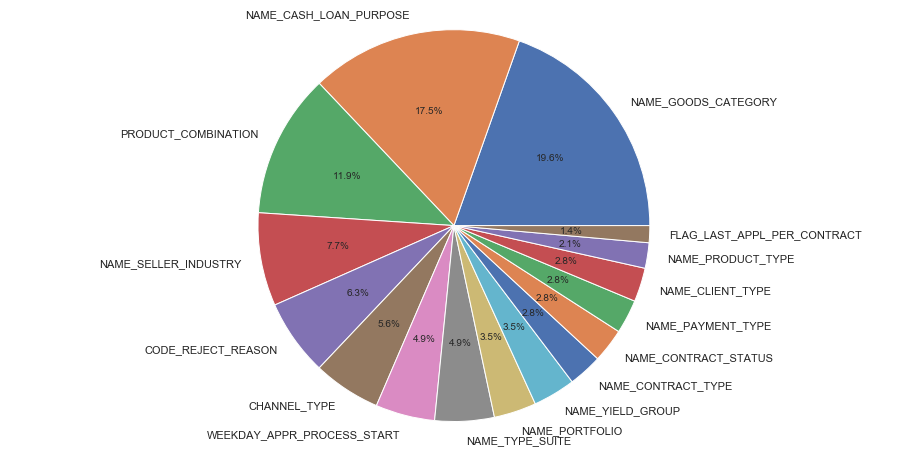

previous_application.csv 資料集非數值型別欄位計有 16 個。


Index,欄位名稱-類別型別,欄位不重複數量
1,NAME_CASH_LOAN_PURPOSE,25
2,PRODUCT_COMBINATION,17
3,NAME_SELLER_INDUSTRY,11
4,CODE_REJECT_REASON,9
5,CHANNEL_TYPE,8
6,WEEKDAY_APPR_PROCESS_START,7
7,NAME_TYPE_SUITE,7
8,NAME_PORTFOLIO,5
9,NAME_YIELD_GROUP,5
10,NAME_CONTRACT_TYPE,4


In [14]:
unique_object_of_column()

In [ ]:
#unique_object_of_index #文件說明

previous_application.csv 資料集之類別型別 "NAME_CONTRACT_STATUS" 欄位計有 4 個不重複的變數。
# Index&Names                                               變數的個數
  1. Approved                                                1,036,781
  2. Refused                                                 290,678
  3. Canceled                                                316,319
  4. Unused offer                                            26,436


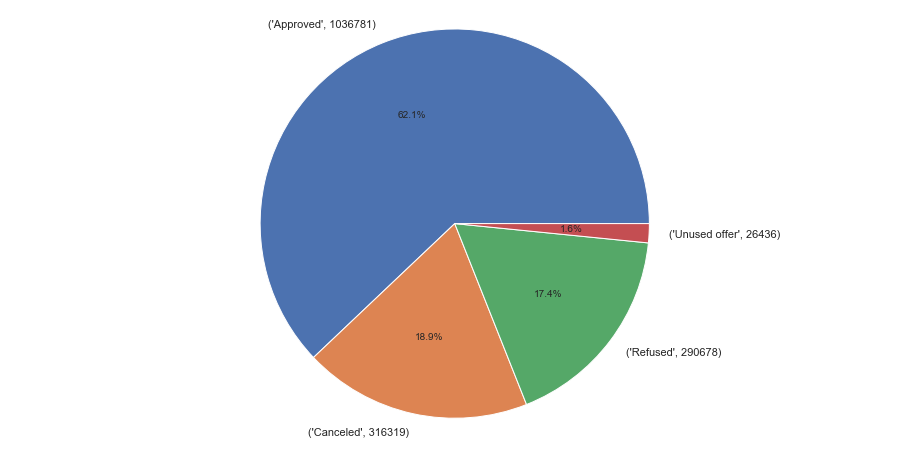

In [15]:
unique_object_of_index(11) #輸入上表清單的index,欄位第一個為預設值。

# 6.視覺化數值型別關聯程度

In [16]:
def show_heatmap(x_axis = 15, y_axis = 10):
    '''將資料集數值型別關聯度以視覺化呈現，參數X，Y可以改變圖的大小。'''
    int_corr=data.select_dtypes(include=['int64','float64']).corr()
    plt.figure(figsize =(x_axis,y_axis))
    sns.heatmap(int_corr,annot = True, fmt='.2f', vmin=0., vmax=1., cmap='YlGnBu', linecolor="white")
    plt.show()
    print('{} 資料集數值型別欄位計有 {} 個。'.format(data_name, len(data.select_dtypes(include=['int64','float64']).columns)))
    return int_corr

In [ ]:
#show_heatmap.__doc__ #文件說明

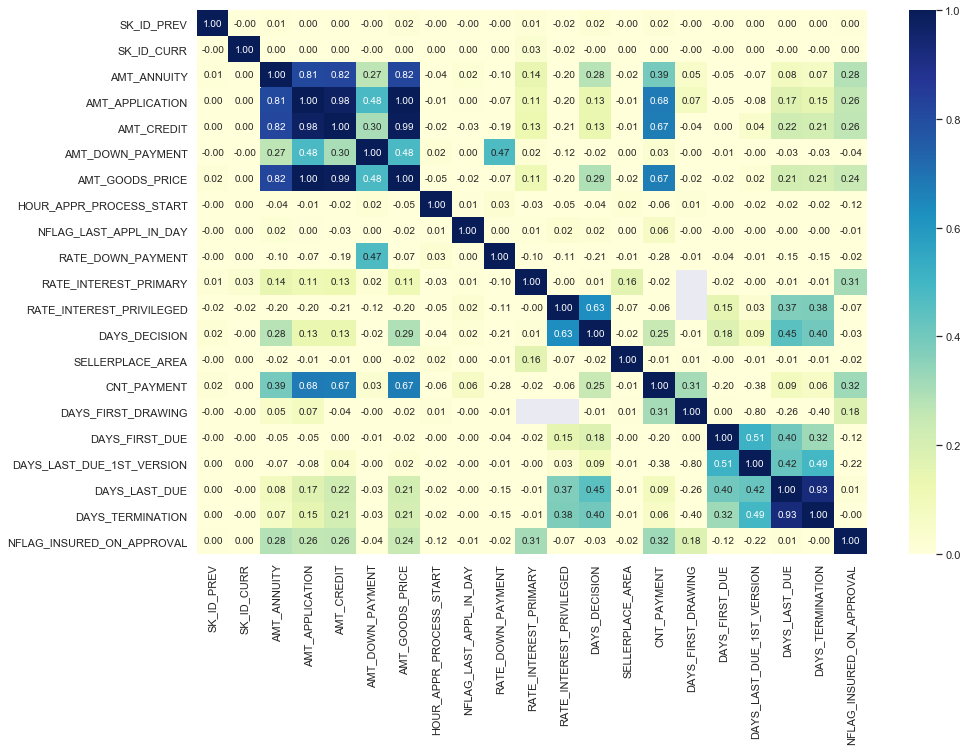

previous_application.csv 資料集數值型別欄位計有 21 個。


,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
SK_ID_PREV,1.00,-0.00,0.01,0.00,0.00,-0.00,0.02,-0.00,-0.00,-0.00,...,-0.02,0.02,-0.00,0.02,-0.00,-0.00,0.00,0.00,0.00,0.00
SK_ID_CURR,-0.00,1.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,...,-0.02,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00
AMT_ANNUITY,0.01,0.00,1.00,0.81,0.82,0.27,0.82,-0.04,0.02,-0.10,...,-0.20,0.28,-0.02,0.39,0.05,-0.05,-0.07,0.08,0.07,0.28
AMT_APPLICATION,0.00,0.00,0.81,1.00,0.98,0.48,1.00,-0.01,0.00,-0.07,...,-0.20,0.13,-0.01,0.68,0.07,-0.05,-0.08,0.17,0.15,0.26
AMT_CREDIT,0.00,0.00,0.82,0.98,1.00,0.30,0.99,-0.02,-0.03,-0.19,...,-0.21,0.13,-0.01,0.67,-0.04,0.00,0.04,0.22,0.21,0.26
AMT_DOWN_PAYMENT,-0.00,-0.00,0.27,0.48,0.30,1.00,0.48,0.02,0.00,0.47,...,-0.12,-0.02,0.00,0.03,-0.00,-0.01,-0.00,-0.03,-0.03,-0.04
AMT_GOODS_PRICE,0.02,0.00,0.82,1.00,0.99,0.48,1.00,-0.05,-0.02,-0.07,...,-0.20,0.29,-0.02,0.67,-0.02,-0.02,0.02,0.21,0.21,0.24
HOUR_APPR_PROCESS_START,-0.00,0.00,-0.04,-0.01,-0.02,0.02,-0.05,1.00,0.01,0.03,...,-0.05,-0.04,0.02,-0.06,0.01,-0.00,-0.02,-0.02,-0.02,-0.12
NFLAG_LAST_APPL_IN_DAY,-0.00,0.00,0.02,0.00,-0.03,0.00,-0.02,0.01,1.00,0.00,...,0.02,0.02,0.00,0.06,-0.00,-0.00,-0.00,-0.00,-0.00,-0.01
RATE_DOWN_PAYMENT,-0.00,0.00,-0.10,-0.07,-0.19,0.47,-0.07,0.03,0.00,1.00,...,-0.11,-0.21,-0.01,-0.28,-0.01,-0.04,-0.01,-0.15,-0.15,-0.02


In [17]:
show_heatmap() #x_axis=15,y_axis=10 為預設值

# 7.取出數值型別關聯程度高的欄位

In [18]:
def pearson_corr(PCCs = 0.7 ):
    '''設定皮爾森係數，選出相關欄位。'''
    int_corr = data.select_dtypes(include=['int64','float64']).corr()
    int_corr = int_corr[int_corr >= PCCs]
    get_index = int_corr.notnull().sum()[int_corr.notnull().sum() > 1]
    get_index_list = get_index.index.values.tolist()
    print ('{} 資料集，在皮爾森相關係數設定為 {} 時，計有 {} 個數值型欄位有相關性。'.format(data_name,PCCs,len(get_index)))
    return get_index_list

In [ ]:
# pearson_corr.__doc__ #文件說明

In [19]:
pearson_corr() # PCCs = 0.7 為預設值

previous_application.csv 資料集，在皮爾森相關係數設定為 0.7 時，計有 6 個數值型欄位有相關性。


['AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION']

# 8.顯示指定數值型欄位盒鬚圖(移除空值後)

In [20]:
def get_int_columns():
    '''排序數值型欄位，並顯示Index。'''
    data_type=data.select_dtypes(include=['int64','float64'])
    index_data=pd.DataFrame(data_type.columns,columns=['數值欄位名稱'] ,index=list(range(1,len(data_type.columns)+1)))
    index_data.columns.name='Index'
    return index_data
def show_boxplot(num=1):
    '''依index選定要顯示欄位盒鬚圖。'''
    data_type=data.select_dtypes(include=['int64','float64'])
    data_int=data_type[data_type.columns[num-1]]
    print ("{} 資料集之\"{}\"數值型欄位的盒鬚圖。".format(data_name,data_type.columns[num-1]))
    plt.boxplot(data_int.dropna())    
    plt.show()

In [ ]:
#get_int_columns.__doc__ #文件說明

In [21]:
get_int_columns()  ##輸入上表清單的index，欄位預設為第一個。

Index,數值欄位名稱
1,SK_ID_PREV
2,SK_ID_CURR
3,AMT_ANNUITY
4,AMT_APPLICATION
5,AMT_CREDIT
6,AMT_DOWN_PAYMENT
7,AMT_GOODS_PRICE
8,HOUR_APPR_PROCESS_START
9,NFLAG_LAST_APPL_IN_DAY
10,RATE_DOWN_PAYMENT


previous_application.csv 資料集之"RATE_INTEREST_PRIVILEGED"數值型欄位的盒鬚圖。


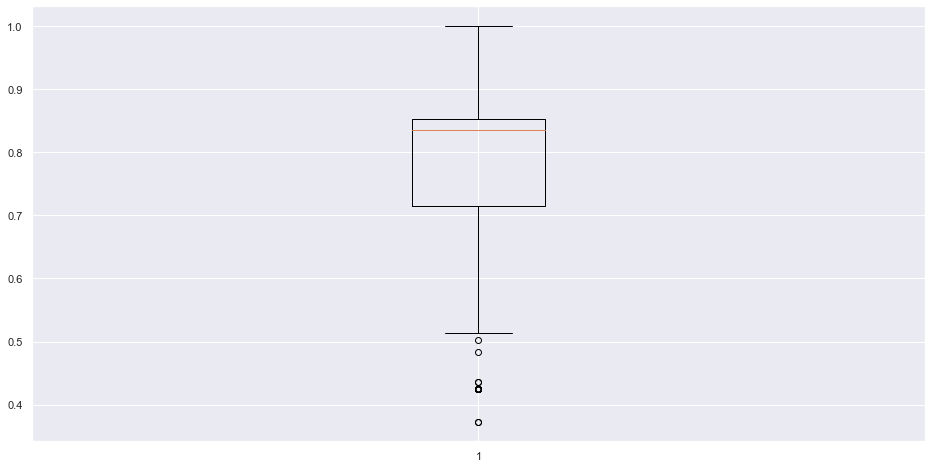

In [22]:
show_boxplot(12)